In [1]:
from utils.helper import Helper
from neural_net import build_and_train
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import cm
from tensorflow.keras.models import load_model

## RT-100

In [2]:
h = Helper('topomaps_RT_100/train/combined', 'topomaps_RT_100/test/combined', 'results/RT_100')

train_it, test_it = h.construct_data_generator(target_size=(128,128))

Found 42515 images belonging to 3 classes.
Found 10629 images belonging to 3 classes.


In [8]:
best_space_model = h.load_best_hyperspace()

In [9]:
best_space_model

{'activation': 'elu',
 'batch_size': 100.0,
 'conv_dropout_drop_proba': 0.3072583126155909,
 'conv_hiddn_units_mult': 0.7655612652817378,
 'conv_kernel_size': 3.0,
 'conv_pool_res_start_idx': 1.0,
 'epochs': 60.0,
 'fc_dropout_drop_proba': 0.12278806206422954,
 'fc_units_1_mult': 0.6510004723476623,
 'first_conv': None,
 'l2_weight_reg_mult': 0.37747519746406716,
 'lr_rate_mult': 1.236441110794273,
 'nb_conv_pool_layers': 3,
 'one_more_fc': None,
 'optimizer': 'RMSprop',
 'pooling_type': 'all_conv',
 'res_conv_kernel_size': 4.0,
 'residual': None,
 'use_BN': True}

In [3]:
model = load_model('models/f58b4_RT.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 30)      840       
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 30)      120       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 30)        8130      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 30)        120       
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 60)        16260 

In [4]:
y_pred = model.predict_generator(test_it)
acc = model.evaluate_generator(test_it)
acc

[0.26616537961221876, 0.9464672]

In [5]:
y_pred = np.argmax(y_pred, axis=1)

y_true = h.y_true

In [6]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1241
           1       0.95      0.95      0.95      5021
           2       0.94      0.94      0.94      4367

    accuracy                           0.95     10629
   macro avg       0.95      0.95      0.95     10629
weighted avg       0.95      0.95      0.95     10629



In [24]:
confusion_matrix(y_true, y_pred, normalize='pred')

array([[0.94299287, 0.00519169, 0.00550711],
       [0.01741884, 0.951877  , 0.05323543],
       [0.03958828, 0.04293131, 0.94125746]])

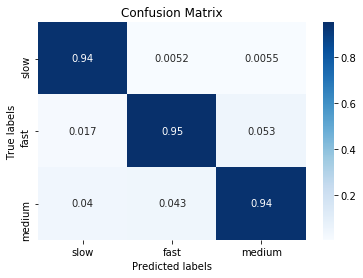

In [8]:
ax= plt.subplot()
sn.heatmap(confusion_matrix(y_true, y_pred, normalize='pred'), 
           annot=True, fmt='.2g', cmap=cm.Blues, ax = ax, cbar=True)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['slow', 'fast', 'medium']); ax.yaxis.set_ticklabels(['slow', 'fast', 'medium']);

## RT-30

In [9]:
h = Helper('topomaps_RT/train/combined', 'topomaps_RT/test/combined', 'results/RT_100')

train_it, test_it = h.construct_data_generator(target_size=(128,128))

Found 56404 images belonging to 3 classes.
Found 14101 images belonging to 3 classes.


In [3]:
best_space_model = h.load_best_hyperspace()
best_space_model

{'activation': 'elu',
 'batch_size': 100.0,
 'conv_dropout_drop_proba': 0.3072583126155909,
 'conv_hiddn_units_mult': 0.7655612652817378,
 'conv_kernel_size': 3.0,
 'conv_pool_res_start_idx': 1.0,
 'epochs': 60.0,
 'fc_dropout_drop_proba': 0.12278806206422954,
 'fc_units_1_mult': 0.6510004723476623,
 'first_conv': None,
 'l2_weight_reg_mult': 0.37747519746406716,
 'lr_rate_mult': 1.236441110794273,
 'nb_conv_pool_layers': 3,
 'one_more_fc': None,
 'optimizer': 'RMSprop',
 'pooling_type': 'all_conv',
 'res_conv_kernel_size': 4.0,
 'residual': None,
 'use_BN': True}

In [4]:
model, model_name, results, log_path = build_and_train(
        best_space_model,
        save_best_weights=True,
        log_for_tensorboard=True
    )

Found 56404 images belonging to 3 classes.
Found 14101 images belonging to 3 classes.
Hyperspace:
{'activation': 'elu', 'batch_size': 100.0, 'conv_dropout_drop_proba': 0.3072583126155909, 'conv_hiddn_units_mult': 0.7655612652817378, 'conv_kernel_size': 3.0, 'conv_pool_res_start_idx': 1.0, 'epochs': 60.0, 'fc_dropout_drop_proba': 0.12278806206422954, 'fc_units_1_mult': 0.6510004723476623, 'first_conv': None, 'l2_weight_reg_mult': 0.37747519746406716, 'lr_rate_mult': 1.236441110794273, 'nb_conv_pool_layers': 3, 'one_more_fc': None, 'optimizer': 'RMSprop', 'pooling_type': 'all_conv', 'res_conv_kernel_size': 4.0, 'residual': None, 'use_BN': True}
0
30
(None, 128, 128, 3)
(None, 128, 128, 30)
(None, 64, 64, 30)
1
60
(None, 64, 64, 30)
(None, 64, 64, 60)
(None, 32, 32, 60)
2
120
(None, 32, 32, 60)
(None, 32, 32, 120)
(None, 16, 16, 120)
(None, 30720)
(None, 651)
Model's weights will be saved to: models/3fece_RT.h5
Tensorboard log files will be saved to: TensorBoard/3fece
Epoch 1/60
565/565 [

565/565 [==============================] - 139s 246ms/step - loss: 0.4068 - accuracy: 0.9170 - val_loss: 0.8096 - val_accuracy: 0.8009
Epoch 51/60
565/565 [==============================] - 140s 248ms/step - loss: 0.4016 - accuracy: 0.9193 - val_loss: 0.9242 - val_accuracy: 0.7586
Epoch 52/60
565/565 [==============================] - 139s 246ms/step - loss: 0.4027 - accuracy: 0.9200 - val_loss: 0.8214 - val_accuracy: 0.7942
Epoch 53/60
565/565 [==============================] - 140s 248ms/step - loss: 0.3971 - accuracy: 0.9226 - val_loss: 0.7983 - val_accuracy: 0.7963
Epoch 54/60
565/565 [==============================] - 139s 247ms/step - loss: 0.3958 - accuracy: 0.9217 - val_loss: 0.8046 - val_accuracy: 0.8055
Epoch 55/60
565/565 [==============================] - 140s 248ms/step - loss: 0.3945 - accuracy: 0.9244 - val_loss: 0.7758 - val_accuracy: 0.8092
Epoch 56/60
565/565 [==============================] - 139s 246ms/step - loss: 0.3917 - accuracy: 0.9254 - val_loss: 0.8338 - val_

In [10]:
# model_name
model_RT_30 = load_model('models/3fece_RT.h5')

In [11]:
y_pred = model_RT_30.predict_generator(test_it)
acc = model_RT_30.evaluate_generator(test_it)
acc

[0.6412968957746351, 0.81838167]

In [12]:
y_pred = np.argmax(y_pred, axis=1)

y_true = h.y_true

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4217
           1       0.79      0.82      0.80      4993
           2       0.79      0.77      0.78      4891

    accuracy                           0.82     14101
   macro avg       0.82      0.82      0.82     14101
weighted avg       0.82      0.82      0.82     14101



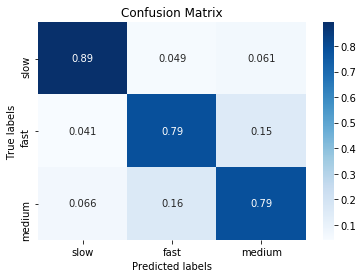

In [13]:
ax= plt.subplot()
sn.heatmap(confusion_matrix(y_true, y_pred, normalize='pred'), 
           annot=True, fmt='.2g', cmap=cm.Blues, ax = ax, cbar=True)

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['slow', 'fast', 'medium']); ax.yaxis.set_ticklabels(['slow', 'fast', 'medium']);